# 精准度-召回率曲线

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.96111111111111114

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [5]:
y_predict = log_reg.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))

[[318   6]
 [  8  28]]
0.823529411765
0.777777777778


In [7]:
decision_scores = log_reg.decision_function(X_test)
thresholds = np.linspace(decision_scores.min(), decision_scores.max(), 101)
precisions = []
recalls = []
for threshold in thresholds:
    y_predict = np.array(decision_scores > threshold, dtype=int)
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))
precisions = np.array(precisions)
recalls = np.array(recalls)

/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


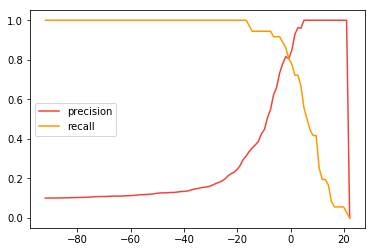

In [11]:
plt.plot(thresholds, precisions, label="precision", color="#f44336")
plt.plot(thresholds, recalls, label="recall", color="#ff9800")
plt.legend()
plt.show()

#### Precision-Recall 曲线

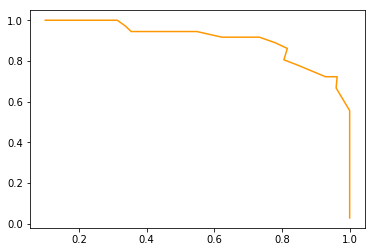

In [15]:
plt.plot(precisions[:-1], recalls[:-1], color="#ff9800")
plt.show()

#### scikit-learn中的Precision-Recall曲线

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [23]:
precisions.shape

(107,)

In [24]:
recalls.shape

(107,)

In [25]:
thresholds.shape

(106,)

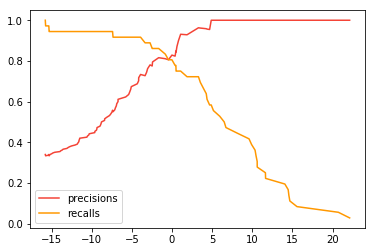

In [27]:
plt.plot(thresholds, precisions[:-1], color="#f44336", label="precisions")
plt.plot(thresholds, recalls[:-1], color="#ff9800", label="recalls")
plt.legend()
plt.show()

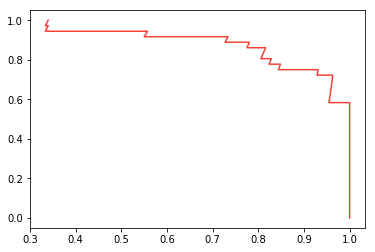

In [20]:
plt.plot(precisions, recalls, color="#f44336")
plt.show()

In [21]:
precision_recall_curve?